In [2]:
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv("/content/diamonddataset.xlsx")

In [ ]:
df.head()

,carat,cut,depth,table,price,x,y,z,Clarity,Color
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,SI2,E
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,SI1,E
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,VS1,E
3,0.29,2,62.4,58.0,334,4.20,4.23,2.63,VS2,I
4,0.31,4,63.3,58.0,335,4.34,4.35,2.75,SI2,J


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   depth    53940 non-null  float64
 3   table    53940 non-null  float64
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
 8   Clarity  53940 non-null  object 
 9   Color    53940 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 4.1+ MB


In [13]:
categorical_cols = []
for col in df.columns:
    if df[col].nunique() <= 9:  # Consider columns with 9 or fewer unique values
        categorical_cols.append(col)

print("Categorical Columns:", categorical_cols)
print("Total number of categorical columns:", len(categorical_cols))


Categorical Columns: ['cut', 'Clarity', 'Color']
Total number of categorical columns: 3


In [14]:
numerical_cols = []
for col in df.columns:
    if df[col].nunique() >= 9:  # Consider columns with at least 9 unique values
        numerical_cols.append(col)

print("Numerical Columns (with at least 9 unique values):", numerical_cols)
print("Total number of numerical columns (with at least 9 unique values):", len(numerical_cols))


Numerical Columns (with at least 9 unique values): ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Total number of numerical columns (with at least 9 unique values): 7


In [6]:
df.shape

(53940, 10)

In [ ]:
df.isnull().sum()

,0
carat,0
cut,0
depth,0
table,0
price,0
x,0
y,0
z,0
Clarity,0
Color,0


In [7]:
df.duplicated().sum()

146

In [8]:
# Find duplicate rows
duplicates = df[df.duplicated(keep=False)]  # Set keep=False to mark all duplicates

# Display duplicates
duplicates


,carat,cut,depth,table,price,x,y,z,Clarity,Color
1004,0.79,1,62.3,57.0,2898,5.90,5.85,3.66,SI1,G
1005,0.79,1,62.3,57.0,2898,5.90,5.85,3.66,SI1,G
1006,0.79,1,62.3,57.0,2898,5.90,5.85,3.66,SI1,G
1007,0.79,1,62.3,57.0,2898,5.90,5.85,3.66,SI1,G
1008,0.79,1,62.3,57.0,2898,5.90,5.85,3.66,SI1,G
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,4,64.1,60.0,2130,0.00,0.00,0.00,SI2,F
50078,0.51,1,61.2,56.0,2203,5.19,5.17,3.17,VVS2,F
50079,0.51,1,61.2,56.0,2203,5.19,5.17,3.17,VVS2,F
52860,0.50,5,79.0,73.0,2579,5.21,5.18,4.09,VS2,E


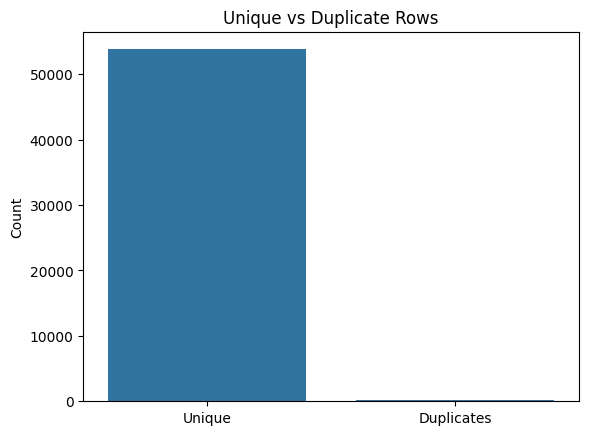

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of duplicates and unique rows
duplicate_count = df.duplicated().sum()
unique_count = len(df) - duplicate_count

# Create a bar plot
sns.barplot(x=["Unique", "Duplicates"], y=[unique_count, duplicate_count])
plt.title("Unique vs Duplicate Rows")
plt.ylabel("Count")
plt.show()


In [30]:
df=df.drop_duplicates()

In [15]:
# Function to calculate outliers using IQR
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Calculate outliers for each numerical column
outlier_counts = {}
for col in numerical_cols:
    outlier_counts[col] = calculate_outliers(df[col])

# Print outlier counts
print("Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


Outlier Counts:
carat: 1873 outliers
depth: 2525 outliers
table: 604 outliers
price: 3523 outliers
x: 31 outliers
y: 28 outliers
z: 48 outliers


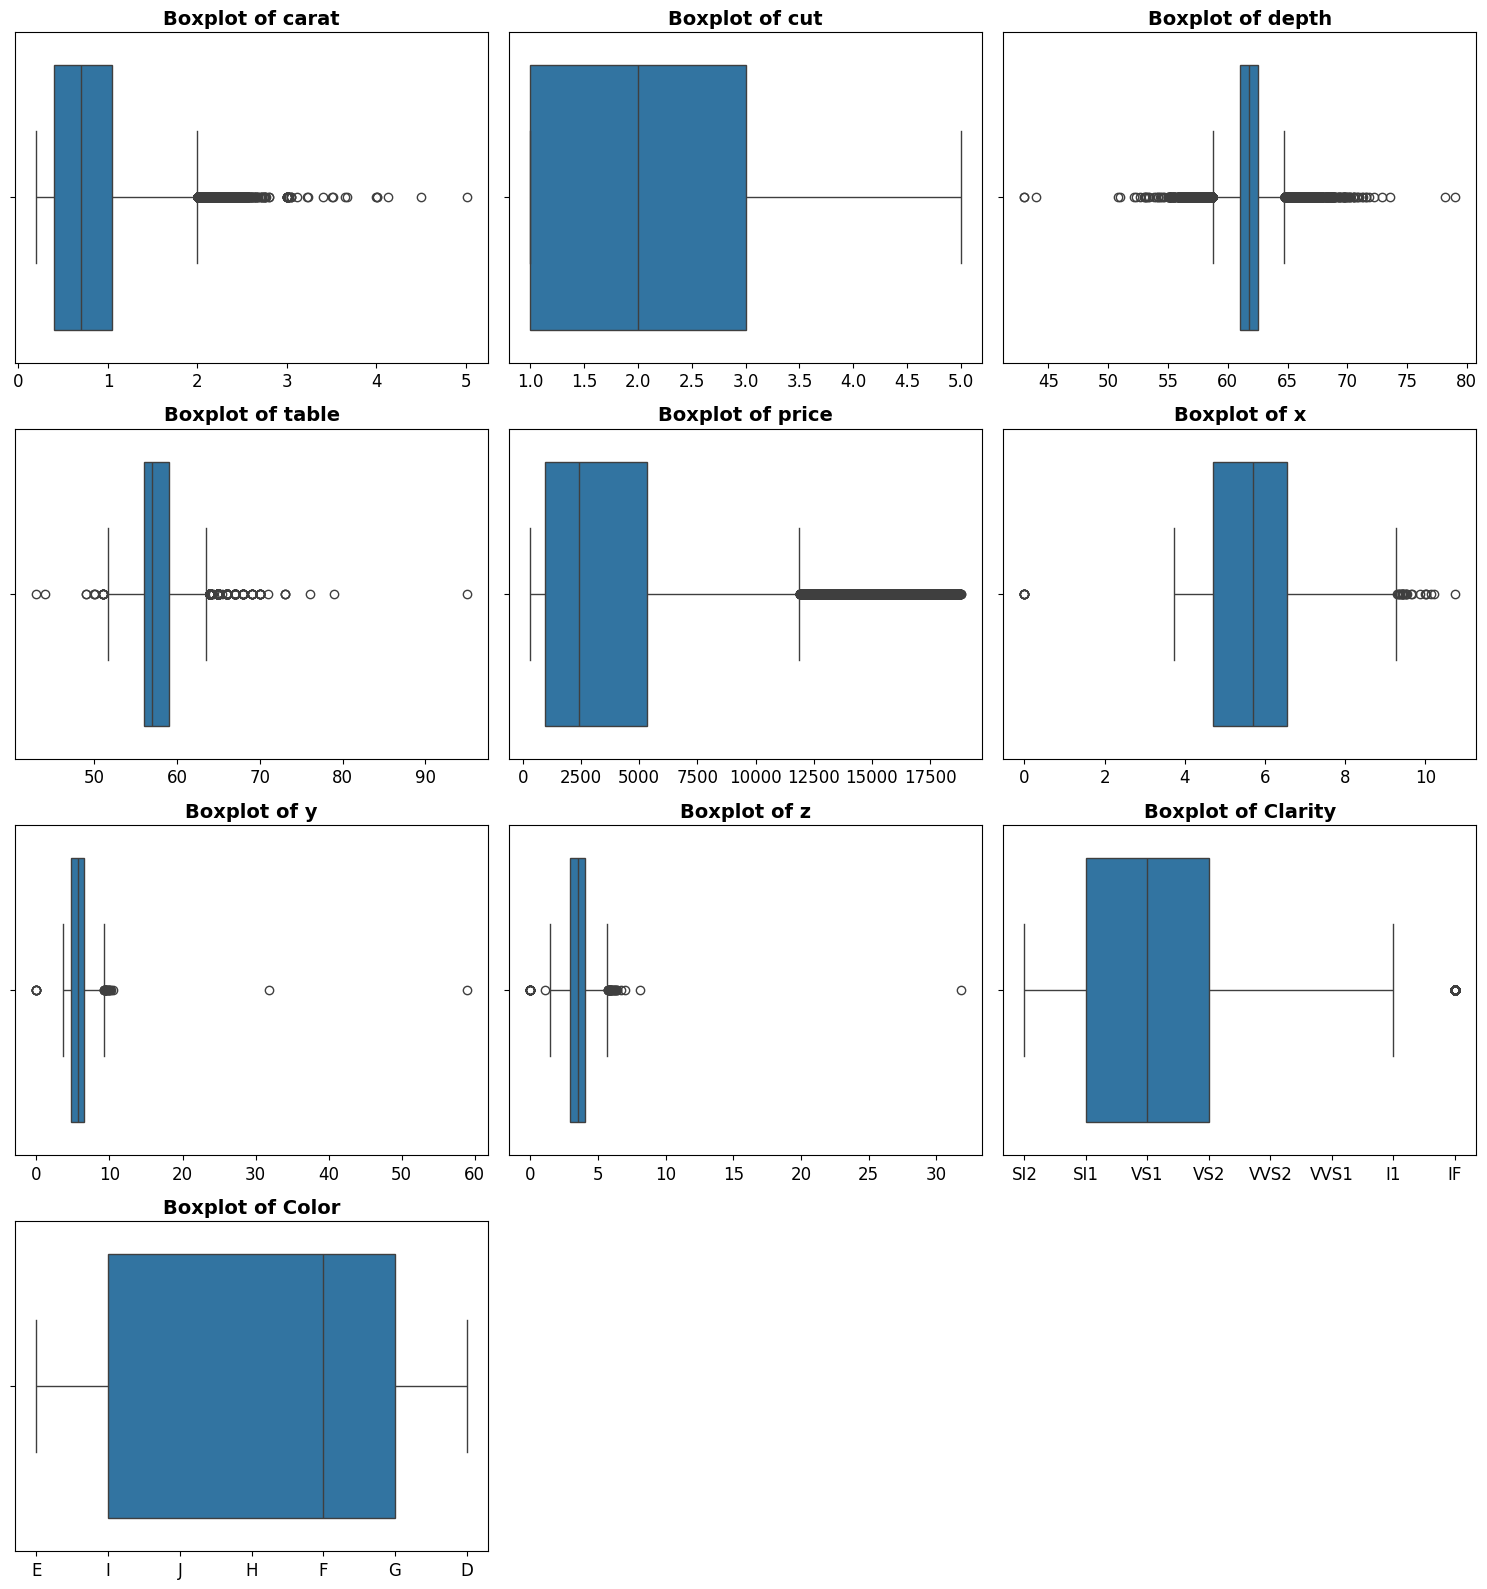

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid layout for the plots
num_cols = len(df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')  # Consistent font style
    axes[i].set_xlabel('')  # Optional: Remove x-axis label for better readability
    axes[i].tick_params(axis='both', labelsize=12)  # Adjust font size for axis ticks

# Hide any extra subplots if columns are not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [31]:
#decide whether to do outliers tratment or not ,if do how?
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw



In [32]:
for i in ['x','y','z']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

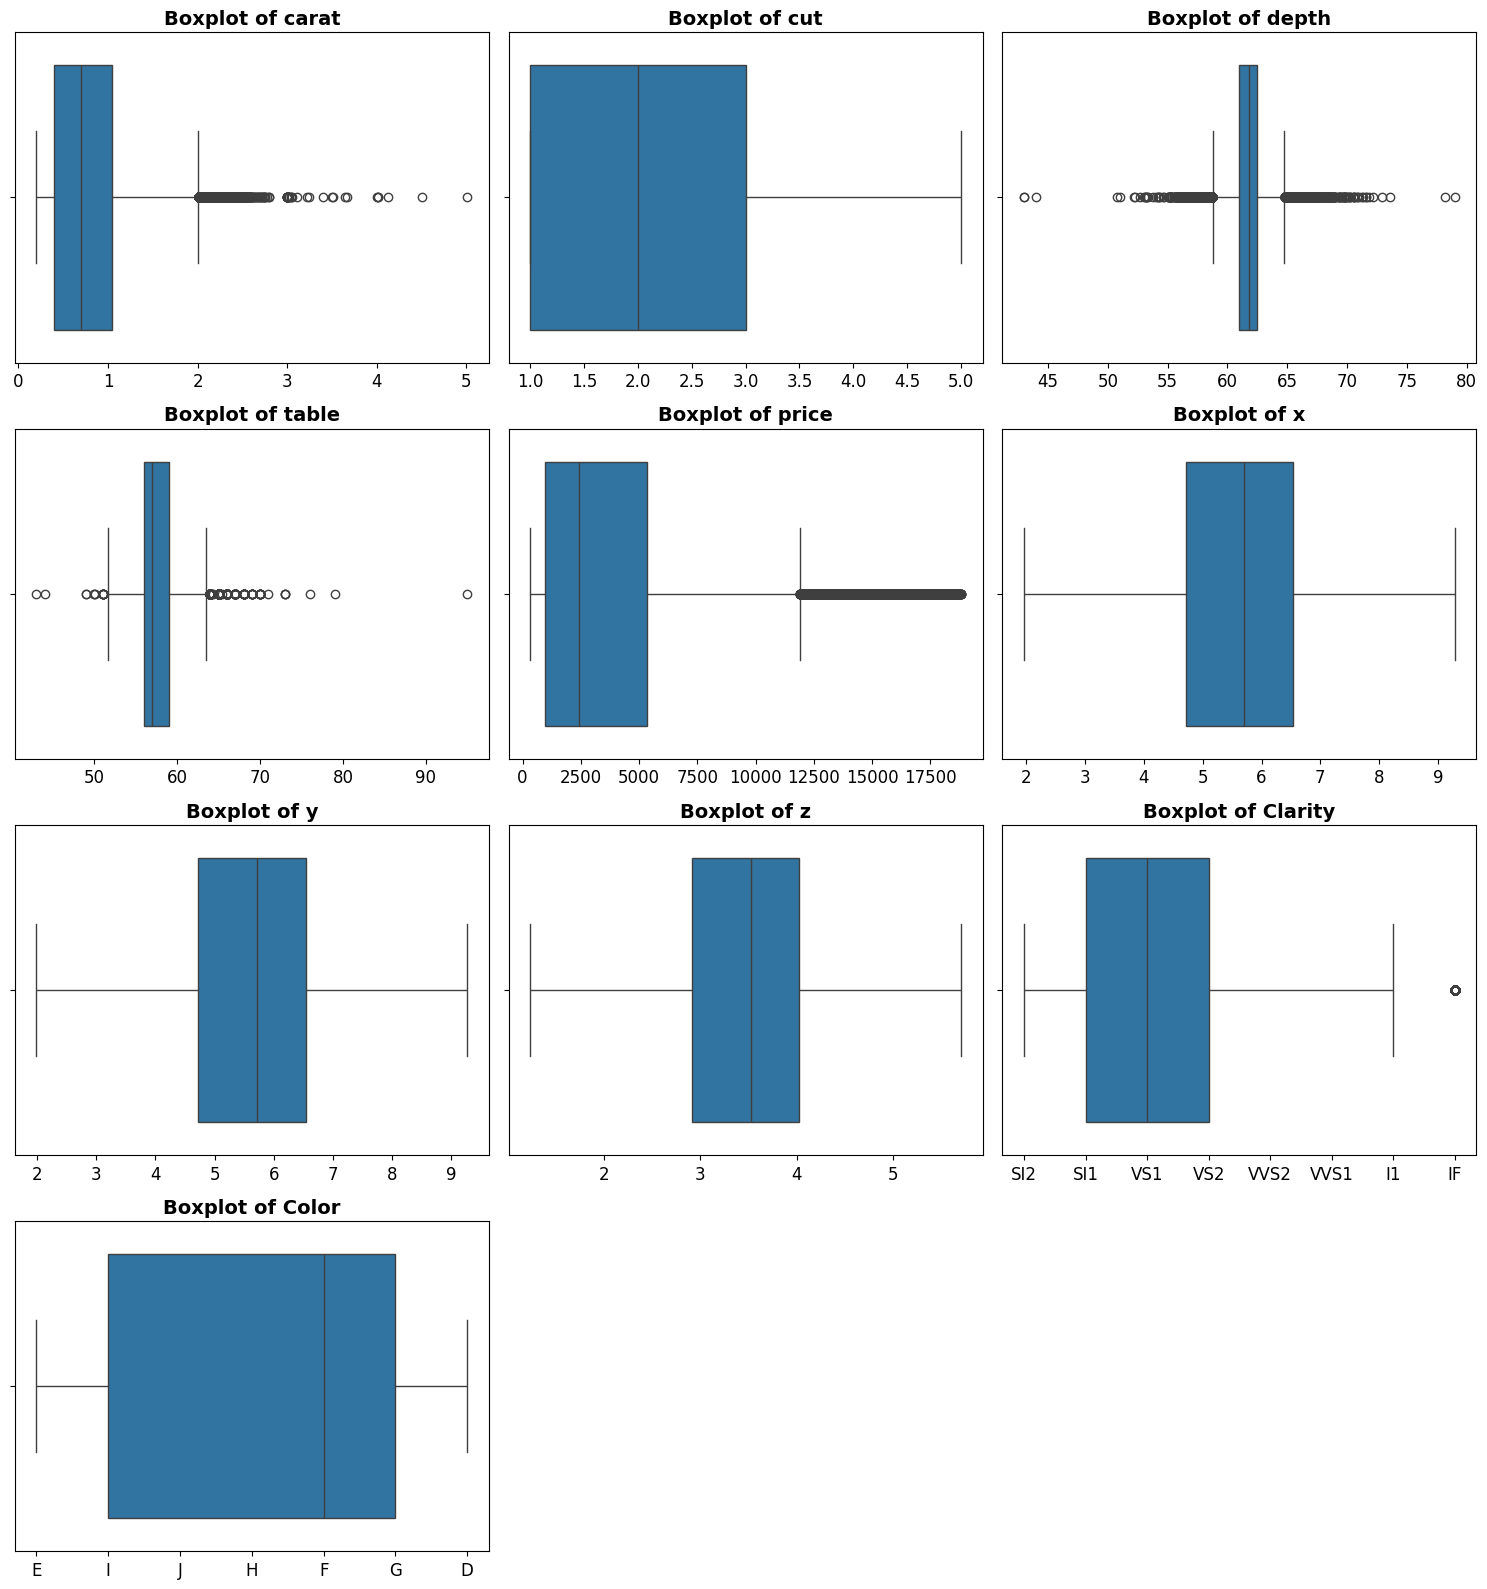

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid layout for the plots
num_cols = len(df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, fontweight='bold')  # Consistent font style
    axes[i].set_xlabel('')  # Optional: Remove x-axis label for better readability
    axes[i].tick_params(axis='both', labelsize=12)  # Adjust font size for axis ticks

# Hide any extra subplots if columns are not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
data_encoded = df.copy()

for col in ['Color', 'Clarity']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(data_encoded)

       carat  cut  depth  table  price     x     y     z  Clarity  Color
0       0.23    1   61.5   55.0    326  3.95  3.98  2.43        3      1
1       0.21    2   59.8   61.0    326  3.89  3.84  2.31        2      1
2       0.23    4   56.9   65.0    327  4.05  4.07  2.31        4      1
3       0.29    2   62.4   58.0    334  4.20  4.23  2.63        5      5
4       0.31    4   63.3   58.0    335  4.34  4.35  2.75        3      6
...      ...  ...    ...    ...    ...   ...   ...   ...      ...    ...
53935   0.72    1   60.8   57.0   2757  5.75  5.76  3.50        2      0
53936   0.72    4   63.1   55.0   2757  5.69  5.75  3.61        2      0
53937   0.70    3   62.8   60.0   2757  5.66  5.68  3.56        2      0
53938   0.86    2   61.0   58.0   2757  6.15  6.12  3.74        3      4
53939   0.75    1   62.2   55.0   2757  5.83  5.87  3.64        3      0

[53794 rows x 10 columns]


In [17]:
X = data_encoded.drop(columns=['Clarity'])
y = data_encoded['Clarity']

In [ ]:
# prompt: random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.6734826656752486
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       141
           1       0.72      0.61      0.66       366
           2       0.67      0.74      0.71      2553
           3       0.76      0.77      0.77      1857
           4       0.59      0.56      0.57      1649
           5       0.65      0.67      0.66      2413
           6       0.69      0.59      0.63       741
           7       0.66      0.60      0.63      1039

    accuracy                           0.67     10759
   macro avg       0.70      0.65      0.67     10759
weighted avg       0.67      0.67      0.67     10759



In [ ]:
data_encoded['Clarity'].value_counts()

,count
Clarity,
2,13065
5,12258
3,9194
4,8171
7,5066
6,3655
1,1790
0,741


In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Convert back to a DataFrame
X_balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
y_balanced_df = pd.DataFrame(y_balanced, columns=['Clarity'])

# Combine the balanced features and target into one DataFrame
balanced_data = pd.concat([X_balanced_df, y_balanced_df], axis=1)


In [ ]:
balanced_data['Clarity'].value_counts()

,count
Clarity,
3,13065
2,13065
4,13065
5,13065
7,13065
6,13065
0,13065
1,13065


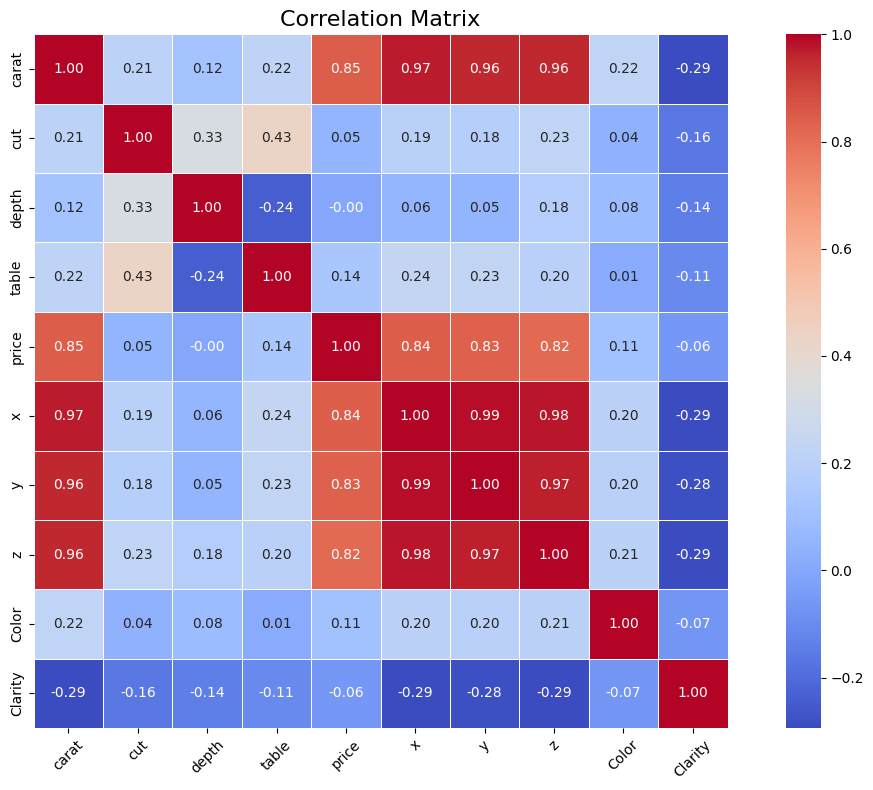

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = balanced_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,             # Annotate the correlation coefficients
    fmt=".2f",              # Format annotations to two decimal places
    cmap="coolwarm",        # Color map for heatmap
    cbar=True,              # Show color bar
    square=True,            # Force square cells
    linewidths=0.5,         # Add lines between cells
    annot_kws={"size": 10}  # Annotation font size
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-learn==1.0.2
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


^C


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Class balancing
scale_pos_weight = len(y_balanced[y_balanced == 0]) / len(y_balanced[y_balanced == 1])

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [9],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Initialize XGBClassifier without scale_pos_weight and use_label_encoder
xgb_classifier = XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    eval_metric="aucpr"
)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train, sample_weight=None)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with best parameters
best_model = grid_search.best_estimator_

# Fit the model using scale_pos_weight during training
best_model.fit(X_train, y_train, sample_weight=[scale_pos_weight if y == 1 else 1 for y in y_train])

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=  15.3s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   5.9s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   8.4s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   7.1s
[CV] END ....learning_rate=0.1, max_depth=9, n_estimators=50; total time=   7.2s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  13.6s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  14.2s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  13.5s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  13.6s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  13.7s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  20.4s
[CV] END ...learning_rate=0.1, max_depth=9, n_es

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 62560, number of used features: 9
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 5, 'num_leave

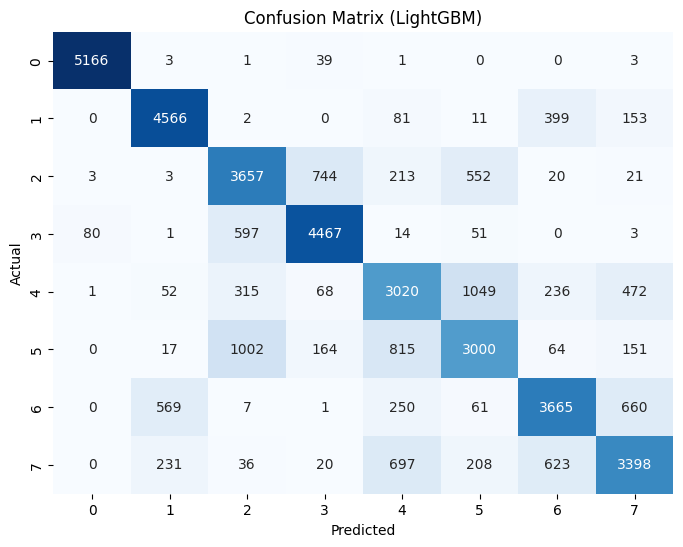

AttributeError: 'LGBMClassifier' object has no attribute 'plot_importance'

<Figure size 1000x600 with 0 Axes>

In [22]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import plot_importance

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42, stratify=y_balanced)


# Optional: Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the reduced parameter distribution
param_dist = {
    'n_estimators': [100, 150],     # Fewer options for faster tuning
    'learning_rate': [0.1, 0.05],  # Narrow range for learning rates
    'max_depth': [6, 8],           # Fewer depth values
    'num_leaves': [31, 50],        # Smaller range for leaves
    'subsample': [0.8],            # Fixed value to reduce variability
    'colsample_bytree': [0.8],     # Fixed value for faster tuning
    'scale_pos_weight': [1, 5],    # Essential weight adjustments
}

# Initialize the LightGBM model
lgb = LGBMClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=10,  # Smaller number of iterations for speed
    cv=3,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1,  # Reduced verbosity
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and model
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_lgb_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_lgb_model.predict(X_test)

# Print evaluation metrics
print("\nBalanced Accuracy Score:")
print(balanced_accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (LightGBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
lgb.plot_importance(best_lgb_model, max_num_features=10, importance_type='gain', title='Feature Importance')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42, stratify=y_balanced)

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 150],  # Fewer values
    'max_depth': [10, 20],       # Narrow range
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]          # Fixed bootstrap
}


# Initialize a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Fewer iterations
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)


# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Test Set Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Test Set Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5213
           1       0.88      0.90      0.89      5212
           2       0.67      0.68      0.67      5213
           3       0.81      0.85      0.83      5213
           4       0.64      0.64      0.64      5213
           5       0.64      0.62      0.63      5213
           6       0.80      0.77      0.78      5213
           7       0.75      0.72      0.73      5213

    accuracy                           0.77     41703
   macro avg       0.77      0.77      0.77     41703
weighted avg       0.77      0.77      0.77     41703



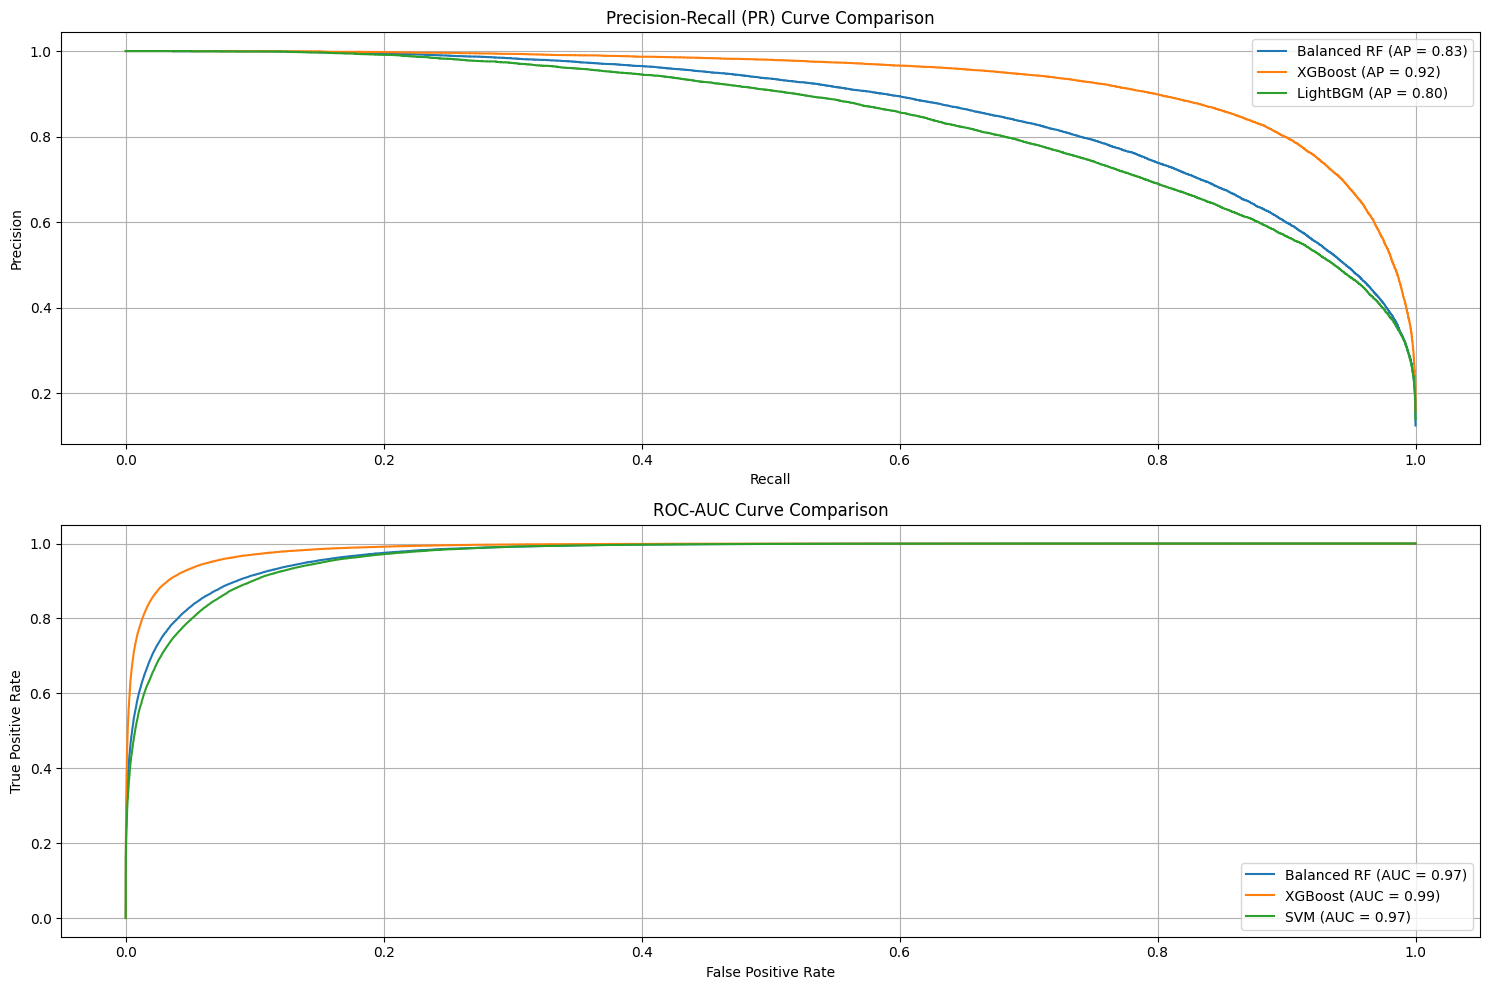

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize  # Import label_binarize

# Initialize figure for PR and ROC-AUC curves
plt.figure(figsize=(15, 10))

# *Subplot for PR Curves*
plt.subplot(2, 1, 1)
plt.title("Precision-Recall (PR) Curve Comparison")

# Binarize y_test for multi-class calculations
y_test_bin = label_binarize(y_test, classes=list(set(y_test))) # Define y_test_bin

for model_name, model in [
    ("Balanced RF", best_rf),
    ("XGBoost", best_model),
    ("LightBGM", best_lgb_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Calculate average precision across all classes
    avg_precision = average_precision_score(y_test_bin, y_scores, average="macro")

    # Compute a macro-average PR curve
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.grid(True)

# *Subplot for ROC-AUC Curves*
plt.subplot(2, 1, 2)
plt.title("ROC-AUC Curve Comparison")

for model_name, model in [
    ("Balanced RF", best_rf),
    ("XGBoost", best_model),
    ("SVM", best_lgb_model)
]:
    # Get prediction probabilities or decision scores
    if hasattr(model, "predict_proba"):  # For models with predict_proba
        y_scores = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):  # For models with decision_function
        y_scores = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {model_name} does not support probability or decision function output.")

    # Compute a macro-average ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel()) # Use y_test_bin here as well
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

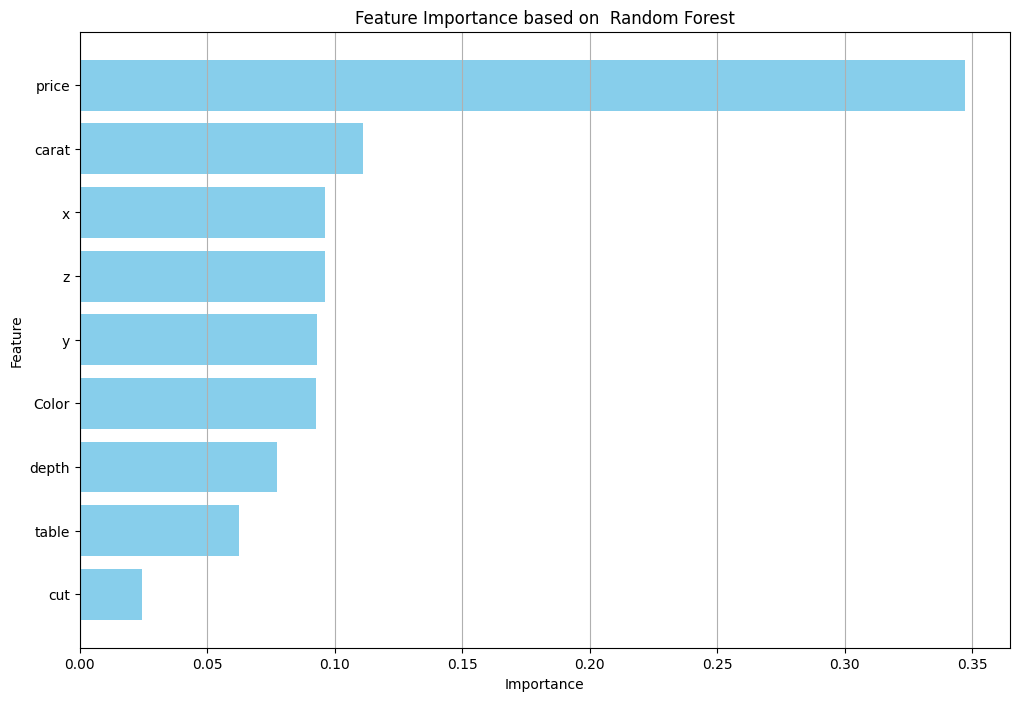

Top 10 Features based on Balanced Random Forest Feature Importance:
  Feature  Importance
4   price    0.347317
0   carat    0.111070
5       x    0.096274
7       z    0.096124
6       y    0.092839
8   Color    0.092624
2   depth    0.077145
3   table    0.062310
1     cut    0.024298


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_rf.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on  Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Top 10 Features based on Balanced Random Forest Feature Importance:")
print(top_10_features)

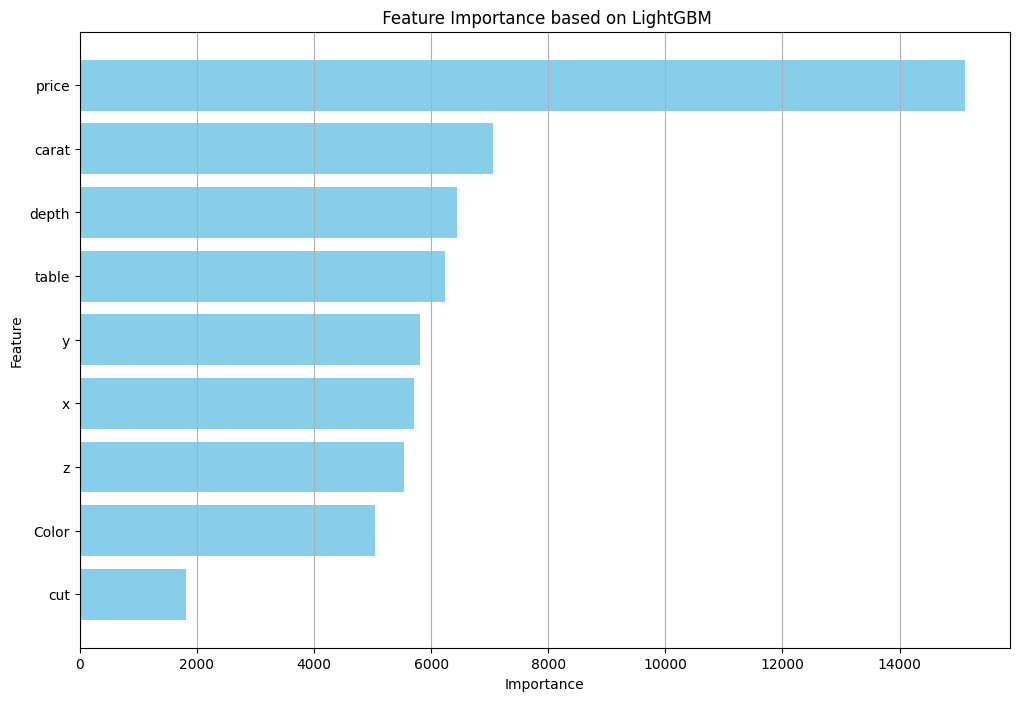

Feature Importance based on LightGBM
  Feature  Importance
4   price       15126
0   carat        7050
2   depth        6449
3   table        6244
6       y        5812
5       x        5713
7       z        5545
8   Color        5041
1     cut        1812


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_lgb_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title(" Feature Importance based on LightGBM")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Feature Importance based on LightGBM")
print(top_10_features)

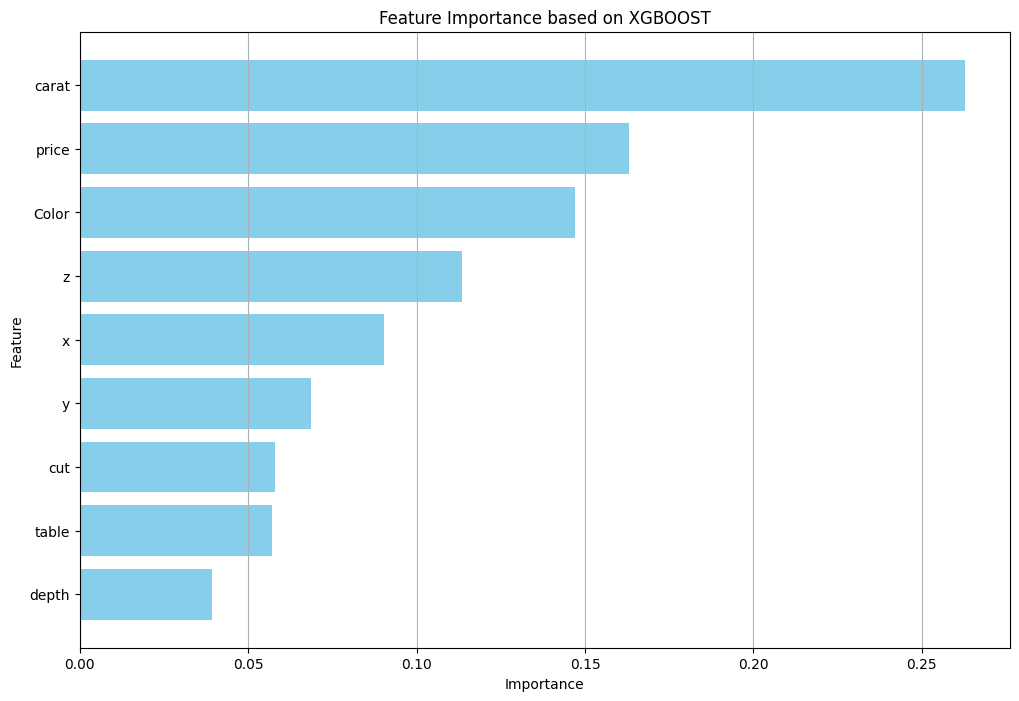

Feature Importance based on XGBOOST
  Feature  Importance
0   carat    0.262960
4   price    0.163159
8   Color    0.146980
7       z    0.113571
5       x    0.090435
6       y    0.068606
1     cut    0.057895
3   table    0.057008
2   depth    0.039386


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Feature Importance based on XGBOOST")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Feature Importance based on XGBOOST")
print(top_10_features)

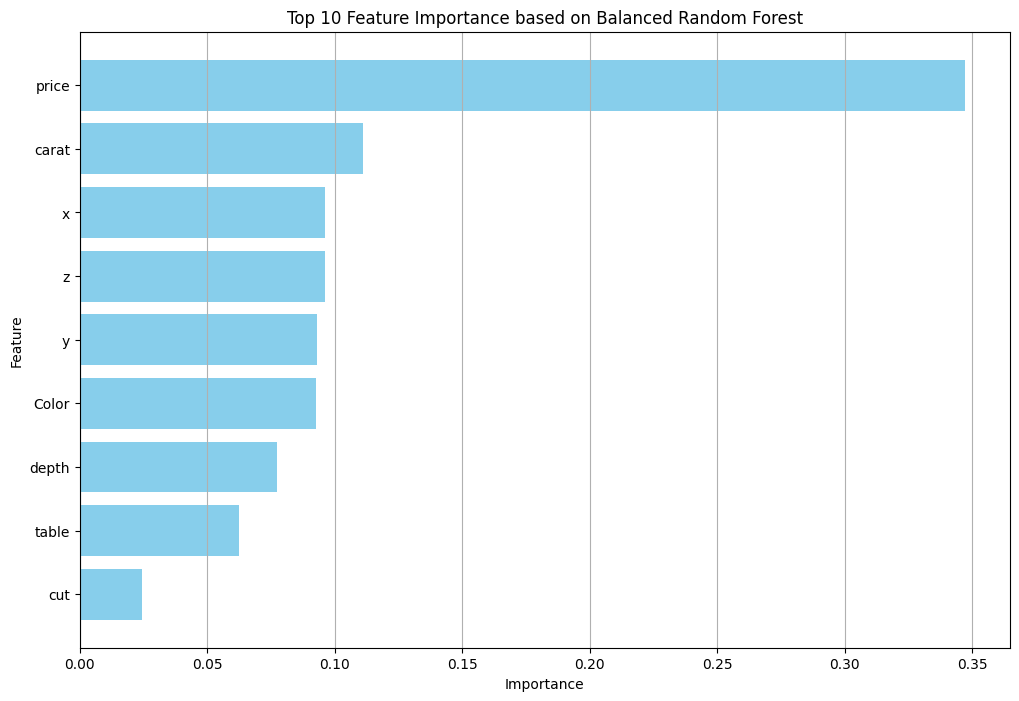

Top 10 Features based on Balanced Random Forest Feature Importance:
  Feature  Importance
4   price    0.347317
0   carat    0.111070
5       x    0.096274
7       z    0.096124
6       y    0.092839
8   Color    0.092624
2   depth    0.077145
3   table    0.062310
1     cut    0.024298


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming brf_model is a trained BalancedRandomForestClassifier and X_train_resampled has feature names

# Get the feature importances
feature_importance = best_rf.feature_importances_

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # X_train_resampled is the DataFrame with feature names
    'Importance': feature_importance
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = importance_df.head(10)

# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.title("Top 10 Feature Importance based on Balanced Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Display most important feature at the top
plt.grid(axis='x')
plt.show()

# Print the top 10 features
print("Top 10 Features based on Balanced Random Forest Feature Importance:")
print(top_10_features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=42, stratify=y_balanced)

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 150],  # Fewer values
    'max_depth': [10, 20],       # Narrow range
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]          # Fixed bootstrap
}


# Initialize a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Fewer iterations
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)


# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Test Set Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Test Set Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5213
           1       0.88      0.90      0.89      5212
           2       0.67      0.68      0.67      5213
           3       0.81      0.85      0.83      5213
           4       0.64      0.64      0.64      5213
           5       0.64      0.62      0.63      5213
           6       0.80      0.77      0.78      5213
           7       0.75      0.72      0.73      5213

    accuracy                           0.77     41703
   macro avg       0.77      0.77      0.77     41703
weighted avg       0.77      0.77      0.77     41703

